# Trexquant Interview Project (The Hangman Game)

* Copyright Trexquant Investment LP. All Rights Reserved. 
* Redistribution of this question without written consent from Trexquant is prohibited

## Instruction:
For this coding test, your mission is to write an algorithm that plays the game of Hangman through our API server. 

When a user plays Hangman, the server first selects a secret word at random from a list. The server then returns a row of underscores (space separated)—one for each letter in the secret word—and asks the user to guess a letter. If the user guesses a letter that is in the word, the word is redisplayed with all instances of that letter shown in the correct positions, along with any letters correctly guessed on previous turns. If the letter does not appear in the word, the user is charged with an incorrect guess. The user keeps guessing letters until either (1) the user has correctly guessed all the letters in the word
or (2) the user has made six incorrect guesses.

You are required to write a "guess" function that takes current word (with underscores) as input and returns a guess letter. You will use the API codes below to play 1,000 Hangman games. You have the opportunity to practice before you want to start recording your game results.

Your algorithm is permitted to use a training set of approximately 250,000 dictionary words. Your algorithm will be tested on an entirely disjoint set of 250,000 dictionary words. Please note that this means the words that you will ultimately be tested on do NOT appear in the dictionary that you are given. You are not permitted to use any dictionary other than the training dictionary we provided. This requirement will be strictly enforced by code review.

You are provided with a basic, working algorithm. This algorithm will match the provided masked string (e.g. a _ _ l e) to all possible words in the dictionary, tabulate the frequency of letters appearing in these possible words, and then guess the letter with the highest frequency of appearence that has not already been guessed. If there are no remaining words that match then it will default back to the character frequency distribution of the entire dictionary.

This benchmark strategy is successful approximately 18% of the time. Your task is to design an algorithm that significantly outperforms this benchmark.

### 1. Data Analysis

In [2]:
words = []
with open('words_250000_train.txt', 'r') as file:
    words = file.read().splitlines()

In [3]:
total_words = len(words)
print(f"Total words: {total_words}")

Total words: 227300


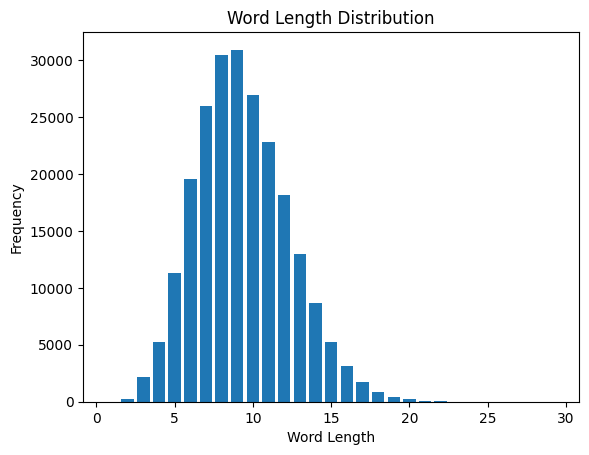

In [4]:
from collections import Counter
import matplotlib.pyplot as plt

word_lengths = [len(word) for word in words]
length_distribution = Counter(word_lengths)

plt.bar(length_distribution.keys(), length_distribution.values())
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Word Length Distribution')
plt.show()

In [5]:
vowels = "aeiou"
vowel_count = sum(char in vowels for word in words for char in word)
consonant_count = sum(char not in vowels and char.isalpha() for word in words for char in word)

print(f"total number of vowels: {vowel_count}")
print(f"total number of consonants: {consonant_count}")


total number of vowels: 825684
total number of consonants: 1299062


In [6]:
avg_vowels_per_word = vowel_count / total_words
avg_consonants_per_word = consonant_count / total_words

print(f"Average number of vowels per word: {avg_vowels_per_word:.2f}")
print(f"Average number of consonants per word: {avg_consonants_per_word:.2f}")


Average number of vowels per word: 3.63
Average number of consonants per word: 5.72


In [7]:
from collections import defaultdict

# initialize a dictionary to hold sums of vowel counts and word counts per word length
vowel_counts_per_length = defaultdict(int)
word_counts_per_length = defaultdict(int)

# Define vowels
vowels = "aeiou"

for word in words:  
    length = len(word)
    vowel_count = sum(1 for char in word if char in vowels)
    vowel_counts_per_length[length] += vowel_count
    word_counts_per_length[length] += 1

# Calculate the average number of vowels per word length
avg_vowels_per_length = {length: vowel_counts_per_length[length] / word_counts_per_length[length] 
                         for length in vowel_counts_per_length}

avg_vowels_per_length


{3: 0.8518855065879146,
 6: 2.3428176654214217,
 4: 1.4808019670890864,
 5: 1.9128969309916621,
 8: 3.0884014186260345,
 7: 2.7040619700940343,
 10: 3.8893258635402366,
 9: 3.482560020707953,
 11: 4.281751952953568,
 12: 4.690174936736715,
 13: 5.102114850262427,
 15: 5.91402801765496,
 14: 5.498622273249139,
 20: 7.888888888888889,
 17: 6.690140845070423,
 16: 6.2758510976773785,
 2: 0.4318181818181818,
 21: 8.061224489795919,
 18: 7.089639115250291,
 19: 7.45124716553288,
 25: 9.666666666666666,
 22: 8.545454545454545,
 1: 0.17647058823529413,
 23: 9.428571428571429,
 29: 9.5,
 24: 9.222222222222221,
 28: 8.0,
 27: 9.0}

From this we can conclude that if the present vovels in the data is more than 3.63 (+1 for buffer) its better to guess a consonant.

### 2. Make an LSTM Model (on local) for the next word prediction 
For this we make a dataset of guessed vovels and try to guess the next consonant (as vovels are going to be our first guess)

In [8]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense

# # Load words from the file
# with open('words_250000_train.txt', 'r') as file:
#     words = file.read().splitlines()

# # Function to generate partial words
# def generate_vowel_guessed_words(word):
#     vowels = "aeiou"
#     # Replace consonants with underscores
#     partial_word = ''.join([char if char in vowels else '_' for char in word])
#     return partial_word


In [9]:
# # Preparing dataset
# partial_words = []
# next_consonants  = []
# vowels = "aeiou"


# for word in words:
#     partial_word = generate_vowel_guessed_words(word)
#     # Identify the consonants that have not been guessed yet
#     remaining_consonants = sorted(set(word) - set(vowels))
    
#     if remaining_consonants:
#         # Add the partial word for each remaining consonant
#         partial_words.extend([partial_word] * len(remaining_consonants))
#         # Add the next consonant to guess
#         next_consonants.extend(remaining_consonants)

In [10]:
# tokenizer = Tokenizer(char_level=True)
# tokenizer.fit_on_texts(words + partial_words + next_consonants)  # Fit tokenizer

# # Convert texts to sequences
# X_seqs = tokenizer.texts_to_sequences(partial_words)
# y_seqs = tokenizer.texts_to_sequences(next_consonants)


# #Commented out the training code
# # Padding sequences
# max_length = max([len(seq) for seq in X_seqs])  # Find max length for padding
# X_padded = pad_sequences(X_seqs, maxlen=max_length, padding='pre')
# # Convert y to categorical
# y_categorical = to_categorical(y_seqs, num_classes=len(tokenizer.word_index) + 1)

# # Splitting the data (assuming you want a simple train/test split)
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_padded, np.array(y_categorical).squeeze(), test_size=0.2, random_state=42)


In [11]:
# model = Sequential([
#     Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_length),
#     LSTM(128, return_sequences=False),
#     Dense(len(tokenizer.word_index) + 1, activation='softmax')
# ])

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))


### Hangman API

In [12]:
import json
import requests
import random
import string
import secrets
import time
import re
import collections

try:
    from urllib.parse import parse_qs, urlencode, urlparse
except ImportError:
    from urlparse import parse_qs, urlparse
    from urllib import urlencode

from requests.packages.urllib3.exceptions import InsecureRequestWarning

requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

In [21]:
class HangmanAPI(object):
    def __init__(self, access_token=None, session=None, timeout=None):
        self.hangman_url = self.determine_hangman_url()
        self.access_token = access_token
        self.session = session or requests.Session()
        self.timeout = timeout
        self.guessed_letters = []

        full_dictionary_location = "words_250000_train.txt"
        self.full_dictionary = self.initial_build_dictionary(full_dictionary_location)
        self.full_dictionary_common_letter_sorted = collections.Counter("".join(self.full_dictionary)).most_common()

        self.current_dictionary = []

        self.n_word_dictionary = self.build_dictionary(self.full_dictionary)
        self.avg_vowels_per_length = {1: 0.176, 2: 0.432, 3: 0.852, 4: 1.481, 5: 1.913, 6: 2.343, 7: 2.704, 8: 3.088, 9: 3.483, 10: 3.889, 11: 4.282, 12: 4.690, 13: 5.102, 14: 5.499, 15: 5.914, 16: 6.276, 17: 6.690, 18: 7.090, 19: 7.451, 20: 7.889, 21: 8.061, 22: 8.545, 23: 9.429, 24: 9.222, 25: 9.667, 27: 9.0, 28: 8.0, 29: 9.5}

    @staticmethod

    def determine_hangman_url():
        links = ['https://trexsim.com', 'https://sg.trexsim.com']

        data = {link: 0 for link in links}

        for link in links:

            requests.get(link)

            for i in range(10):
                s = time.time()
                requests.get(link)
                data[link] = time.time() - s

        link = sorted(data.items(), key=lambda x: x[1])[0][0]
        link += '/trexsim/hangman'
        return link

    @staticmethod
    def initial_build_dictionary(dictionary_file_location):
        with open(dictionary_file_location, "r") as text_file:
            return text_file.read().splitlines()

    def build_dictionary(self, word_list):
        max_length = max(len(word) for word in word_list)
        n_word_dict = {i: [] for i in range(3, max_length + 1)}

        for word in word_list:
            for count in range(3, len(word) + 1):
                n_word_dict[count].extend(word[i:i + count] for i in range(len(word) - count + 1))

        return n_word_dict

    @staticmethod
    def vowel_count(word):
        vowels = "aeiou"
        return sum(char in vowels for char in word) if word else 0

    @staticmethod
    def filter_and_count_letters(words):
        letter_counter = collections.Counter()
        for word in words:
            letter_counter.update(set(word))
        return letter_counter

    def find_matching_words(self, pattern, word_list):
        regex = re.compile(pattern)
        return [word for word in word_list if regex.match(word)]

    def guess(self, word):
        pattern = word[::2].replace("_", ".")
        len_word = len(pattern)
        clean_word_count = self.vowel_count(pattern)
        # average vowels for the specific length or use default
        avg_vowels = self.avg_vowels_per_length.get(len_word,4)
        

        def make_guess_from(words):
            letter_counts = self.filter_and_count_letters(words)
            for letter, _ in letter_counts.most_common():

                # Logging variable states to a text file
                with open('log.txt', 'a') as log_file:  # 'a' mode to append to the end of the file
                    log_file.write(f"Letter: {letter}, Type of Letter: {type(letter)}, Clean Word Count: {clean_word_count}, Avg Vowels: {avg_vowels}\n")

                if letter not in self.guessed_letters:
                    if letter in "aeiou" and clean_word_count > avg_vowels+0.5: #+.5 for buffer
                        self.guessed_letters.append(letter)
                    else:
                        return letter
            return '/'

        filtered_words = self.find_matching_words(pattern, self.current_dictionary)
        self.current_dictionary = filtered_words

        guess_letter = make_guess_from(filtered_words)
        if guess_letter == '/':
            for x in [int(len(pattern) / 2), int(len(pattern) / 3)]:
                if x >= 3:
                    segment_words = []
                    for i in range(len(pattern) - x + 1):
                        segment = pattern[i:i + x]
                        segment_words.extend(self.find_matching_words(segment, self.n_word_dictionary.get(x, [])))
                    guess_letter = make_guess_from(segment_words)
                    if guess_letter != '/':
                        break

        if guess_letter == '/':
            guess_letter = make_guess_from(self.full_dictionary_common_letter_sorted)
        
        if guess_letter != '/':
            return guess_letter
        else:
            return self.late_guess_strategy(pattern)


    def late_guess_strategy(self, clean_word):
        sequence = tokenizer.texts_to_sequences([clean_word])[0]
        padded_sequence = pad_sequences([sequence], maxlen=10, padding='pre')
        
        #using local model with attached training code
        prediction = model.predict(padded_sequence)
        next_index = np.argmax(prediction, axis=-1)[0]
        next_letter = tokenizer.index_word.get(next_index, ' ')
        
        if next_letter not in self.guessed_letters:
            return next_letter
        else:
            # Fallback to next most common letter if LSTM's guess is already guessed
            for letter, _ in sorted(tokenizer.word_index.items(), key=lambda x: prediction[0][x[1]], reverse=True):
                if letter not in self.guessed_letters:
                    return letter


    def build_common_letter_sorted_list(self, dictionary_file_location):
        with open(dictionary_file_location, "r") as file:
            words = file.read().splitlines()
        letter_counts = self.filter_and_count_letters(words)
        return letter_counts.most_common()



    def start_game(self, practice=True, verbose=True):
        # reset guessed letters to empty set and current plausible dictionary to the full dictionary
        self.guessed_letters = []
        self.current_dictionary = self.full_dictionary

        response = self.request("/new_game", {"practice":practice})
        if response.get('status')=="approved":
            game_id = response.get('game_id')
            word = response.get('word')
            tries_remains = response.get('tries_remains')
            if verbose:
                print("Successfully start a new game! Game ID: {0}. # of tries remaining: {1}. Word: {2}.".format(game_id, tries_remains, word))
            while tries_remains>0:
                # get guessed letter from user code
                guess_letter = self.guess(word)

                # append guessed letter to guessed letters field in hangman object
                self.guessed_letters.append(guess_letter)
                if verbose:
                    print("Guessing letter: {0}".format(guess_letter))

                try:
                    res = self.request("/guess_letter", {"request":"guess_letter", "game_id":game_id, "letter":guess_letter})
                except HangmanAPIError:
                    print('HangmanAPIError exception caught on request.')
                    continue
                except Exception as e:
                    print('Other exception caught on request.')
                    raise e

                if verbose:
                    print("Sever response: {0}".format(res))
                status = res.get('status')
                tries_remains = res.get('tries_remains')
                if status=="success":
                    if verbose:
                        print("Successfully finished game: {0}".format(game_id))
                    return True
                elif status=="failed":
                    reason = res.get('reason', '# of tries exceeded!')
                    if verbose:
                        print("Failed game: {0}. Because of: {1}".format(game_id, reason))
                    return False
                elif status=="ongoing":
                    word = res.get('word')
        else:
            if verbose:
                print("Failed to start a new game")
        return status=="success"

    def my_status(self):
        return self.request("/my_status", {})

    def request(
            self, path, args=None, post_args=None, method=None):
        if args is None:
            args = dict()
        if post_args is not None:
            method = "POST"

        # Add `access_token` to post_args or args if it has not already been
        # included.
        if self.access_token:
            # If post_args exists, we assume that args either does not exists
            # or it does not need `access_token`.
            if post_args and "access_token" not in post_args:
                post_args["access_token"] = self.access_token
            elif "access_token" not in args:
                args["access_token"] = self.access_token

        try:
            # response = self.session.request(
            response = requests.request(
                method or "GET",
                self.hangman_url + path,
                timeout=self.timeout,
                params=args,
                data=post_args)
        except requests.HTTPError as e:
            response = json.loads(e.read())
            raise HangmanAPIError(response)

        headers = response.headers
        if 'json' in headers['content-type']:
            result = response.json()
        elif "access_token" in parse_qs(response.text):
            query_str = parse_qs(response.text)
            if "access_token" in query_str:
                result = {"access_token": query_str["access_token"][0]}
                if "expires" in query_str:
                    result["expires"] = query_str["expires"][0]
            else:
                raise HangmanAPIError(response.json())
        else:
            raise HangmanAPIError('Maintype was not text, or querystring')

        if result and isinstance(result, dict) and result.get("error"):
            raise HangmanAPIError(result)
        return result

class HangmanAPIError(Exception):
    def __init__(self, result):
        self.result = result
        self.code = None
        try:
            self.type = result["error_code"]
        except (KeyError, TypeError):
            self.type = ""

        try:
            self.message = result["error_description"]
        except (KeyError, TypeError):
            try:
                self.message = result["error"]["message"]
                self.code = result["error"].get("code")
                if not self.type:
                    self.type = result["error"].get("type", "")
            except (KeyError, TypeError):
                try:
                    self.message = result["error_msg"]
                except (KeyError, TypeError):
                    self.message = result

        Exception.__init__(self, self.message)

In [14]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('my_lstm_model.h5')
# Load dataset
with open('words_250000_train.txt', 'r') as file:
    words = file.read().splitlines()

# Character tokenization
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(words)

# Convert words to sequences of integers
sequences = tokenizer.texts_to_sequences(words)


# API Usage Examples

## To start a new game:
1. Make sure you have implemented your own "guess" method.
2. Use the access_token that we sent you to create your HangmanAPI object. 
3. Start a game by calling "start_game" method.
4. If you wish to test your function without being recorded, set "practice" parameter to 1.
5. Note: You have a rate limit of 20 new games per minute. DO NOT start more than 20 new games within one minute.

In [22]:
api = HangmanAPI(access_token="6f22a019bde0f94008a3ad7b319ad2", timeout=2000)


## Playing practice games:
You can use the command below to play up to 100,000 practice games.

In [23]:
api.start_game(practice=1,verbose=True)
[total_practice_runs,total_recorded_runs,total_recorded_successes,total_practice_successes] = api.my_status() # Get my game stats: (# of tries, # of wins)
practice_success_rate = total_practice_successes / total_practice_runs
print('run %d practice games out of an allotted 100,000. practice success rate so far = %.3f' % (total_practice_runs, practice_success_rate))


Successfully start a new game! Game ID: 9487751c88c8. # of tries remaining: 6. Word: _ _ _ _ _ _ _ _ _ _ _ _ _ .
Guessing letter: i
Sever response: {'game_id': '9487751c88c8', 'status': 'ongoing', 'tries_remains': 6, 'word': '_ _ _ _ i _ _ _ _ i _ _ _ '}
Guessing letter: a
Sever response: {'game_id': '9487751c88c8', 'status': 'ongoing', 'tries_remains': 6, 'word': '_ _ _ _ i _ _ _ _ i _ a _ '}
Guessing letter: c
Sever response: {'game_id': '9487751c88c8', 'status': 'ongoing', 'tries_remains': 6, 'word': 'c _ c c i _ _ _ _ i _ a _ '}
Guessing letter: t
Sever response: {'game_id': '9487751c88c8', 'status': 'ongoing', 'tries_remains': 5, 'word': 'c _ c c i _ _ _ _ i _ a _ '}
Guessing letter: n
Sever response: {'game_id': '9487751c88c8', 'status': 'ongoing', 'tries_remains': 5, 'word': 'c _ c c i n _ _ _ i _ a _ '}
Guessing letter: l
Sever response: {'game_id': '9487751c88c8', 'status': 'ongoing', 'tries_remains': 5, 'word': 'c _ c c i n _ l l i _ a _ '}
Guessing letter: e
Sever response: 

In [ ]:
# Set the target practice success rate
target_success_rate = 0.6

# Continue the loop until the practice success rate reaches the target
while practice_success_rate < target_success_rate and total_practice_runs < 100000:
    # Start a new game

    api.start_game(practice=1, verbose=True)


    # Get updated game stats
    [total_practice_runs, total_recorded_runs, total_recorded_successes, total_practice_successes] = api.my_status()

    # Calculate the practice success rate
    practice_success_rate = total_practice_successes / total_practice_runs

    # Print the current status
    print('run %d practice games out of an allotted 100,000. practice success rate so far = %.3f' % (total_practice_runs, practice_success_rate))

# Print a message when the loop exits
if practice_success_rate >= target_success_rate:
    print("Achieved the target practice success rate of %.3f!" % target_success_rate)
else:
    print("Exceeded the maximum allowed practice games (100,000) without reaching the target success rate.")

## Playing recorded games:
Please finalize your code prior to running the cell below. Once this code executes once successfully your submission will be finalized. Our system will not allow you to rerun any additional games.

Please note that it is expected that after you successfully run this block of code that subsequent runs will result in the error message "Your account has been deactivated".

Once you've run this section of the code your submission is complete. Please send us your source code via email.

In [ ]:
for i in range(990,1000):
    print('Playing ', i, ' th game')
    # Uncomment the following line to execute your final runs. Do not do this until you are satisfied with your submission
    api.start_game(practice=0,verbose=False)
    
    # DO NOT REMOVE as otherwise the server may lock you out for too high frequency of requests
    time.sleep(0.5)

## To check your game statistics
1. Simply use "my_status" method.
2. Returns your total number of games, and number of wins.

In [34]:
[total_practice_runs,total_recorded_runs,total_recorded_successes,total_practice_successes] = api.my_status() # Get my game stats: (# of tries, # of wins)
success_rate = total_recorded_successes/total_recorded_runs
print('overall success rate = %.3f' % success_rate)

overall success rate = 59.000
